<h1> Credit Card Fraud Detection </h1>
<p><b>Explainable AI (XAI) for Credit Card Fraud Detection</b> offers a powerful approach to not only detect fraudulent transactions but also to provide insights into why a certain transaction was flagged as fraud. This is important for building trust with end-users (such as banks or customers) and ensuring compliance with regulatory standards.</p>

<p>Here’s an in-depth explanation of how you can develop an XAI-based credit card fraud detection model using techniques like <b>LIME</b> and <b>SHAP</b>, and why it is a novel approach:</p>

<ul>
    <li><b>1. Overview of XAI in Fraud Detection</b></li>
    <p>In traditional credit card fraud detection models, decisions are often made by complex algorithms such as neural networks, XGBoost, or Random Forests. These models act as "black boxes," meaning they make predictions without providing understandable reasons for those predictions. This lack of interpretability can raise issues in:</p>
    <ul>
        <li>Building trust with users, customers, and financial institutions.</li>
        <li>Complying with regulatory requirements (especially in sectors like finance, where transparency is essential).</li>
        <li>Identifying errors or biases in the model, which can lead to misclassifications.</li>
    </ul>
    <p>With XAI, the goal is to make these "black box" models interpretable by providing explanations for the decisions made by the model, particularly when detecting fraudulent transactions.</p>
    
 <li><b>2. How the Model Works</b></li>
    <ul>
        <li><b>a. Develop the Core Model (Fraud Detection Model)</b></li>
        <p>First, you need to develop a fraud detection model that can predict whether a transaction is fraudulent or not. Some commonly used models for this are:</p>
        <ul>
            <li>Random Forests</li>
            <li>Gradient Boosting Machines (GBM)</li>
            <li>XGBoost</li>
            <li>Neural Networks</li>
        </ul>
        <p>Train your model using a credit card transaction dataset with features like:</p>
        <ul>
            <li>Transaction amount</li>
            <li>Location</li>
            <li>Merchant type</li>
            <li>Time of transaction</li>
            <li>Account history</li>
        </ul>
        <p>After training the model, evaluate it using appropriate metrics like precision, recall, F1-score, and AUC-ROC, given the imbalanced nature of fraud detection.</p>

  <li><b>b. Integrating Explainability Techniques</b></li>
        <p>Once the fraud detection model is developed and trained, the next step is to integrate explainability techniques to understand why the model is classifying transactions as fraud or non-fraud. Here, you can use either <b>LIME</b> or <b>SHAP</b>, which are popular XAI tools.</p>
    </ul>
 <li><b>3. Explainability Tools: LIME and SHAP</b></li>
    <ul>
        <li><b>a. LIME (Local Interpretable Model-agnostic Explanations)</b></li>
        <p>LIME works by locally approximating the behavior of the complex model around a specific prediction. Essentially, it creates a simpler interpretable model for each prediction and explains what features most contributed to a specific decision.</p>
        <p><b>How LIME Works:</b></p>
        <ul>
            <li>Take an individual transaction.</li>
            <li>Generate random perturbations (slightly modified versions) of this transaction’s data.</li>
            <li>Pass these perturbed transactions through the original model to get their predictions.</li>
            <li>Build a simpler interpretable model (e.g., a linear model) based on these predictions, and see how the features influenced the outcome.</li>
        </ul>
        <p><b>For Fraud Detection:</b></p>
        <p>After detecting fraud in a specific transaction, LIME would highlight which features (such as a sudden increase in the transaction amount, unusual transaction time, or location) most contributed to the fraud classification.</p>

   <li><b>b. SHAP (SHapley Additive exPlanations)</b></li>
        <p>SHAP is based on cooperative game theory and provides a unified framework for interpreting predictions. It assigns each feature a Shapley value, which represents how much that feature contributed to the prediction (either positively or negatively).</p>
        <p><b>How SHAP Works:</b></p>
        <ul>
            <li>SHAP computes the marginal contribution of each feature by considering all possible combinations of features and how they change the model’s prediction.</li>
        </ul>
        <p><b>For Fraud Detection:</b></p>
        <p>SHAP can provide a global view of how features generally affect the fraud detection model's decisions. It can also provide local explanations for specific transactions, showing the exact contribution of features for that transaction.</p>
    </ul>
<li><b>4. Advantages of Using XAI for Credit Card Fraud Detection</b></li>
    <ul>
        <li><b>a. Improved Trust and Transparency</b></li>
        <p>When a transaction is flagged as fraudulent, explaining the reasons behind it (e.g., high transaction amount, unusual location, or irregular patterns) improves trust with customers and financial institutions.</p>

  <li><b>b. Regulatory Compliance</b></li>
        <p>Many industries, especially finance, require transparency in how AI models make decisions. Using XAI techniques ensures that your model complies with these regulations by providing explanations for its decisions.</p>
    <li><b>c. Bias Detection and Fairness</b></li>
        <p>By explaining individual decisions, XAI can help identify if the model is unfairly biased against certain groups of users or types of transactions (e.g., wrongly flagging transactions from specific locations or times).</p>
    </ul>
</ul>

<p>By using Explainable AI for credit card fraud detection, you’re not only building a robust and accurate model but also making sure that its decisions are transparent and understandable. This improves customer trust, ensures regulatory compliance, and provides deeper insights into the model’s behavior.</p>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data= pd.read_csv("C:\\Users\\Desktop\\datasets gracy ml\\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Check for NaN values in the DataFrame
nan_values = data.isna().sum()
nan_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Drop Nan values
data.dropna(inplace=True)

In [12]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

C:\Users\Nishar Ansari\AppData\Local\Temp\ipykernel_2752\4196518991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


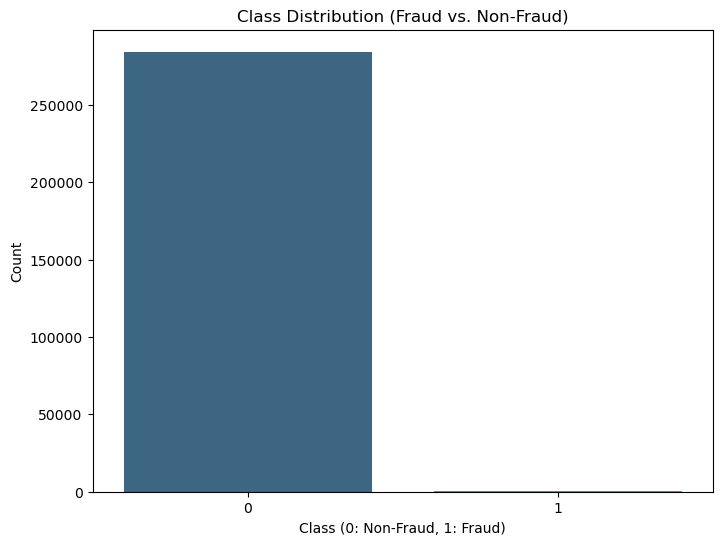

In [13]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.show()

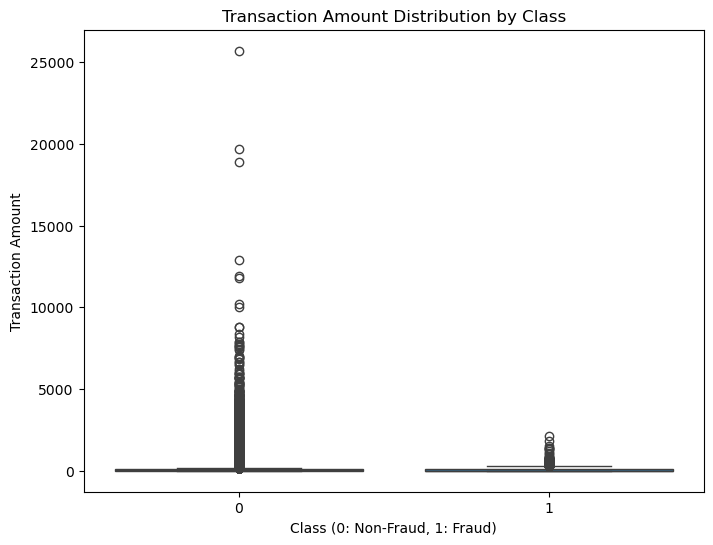

In [14]:
# Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Class')
plt.show()

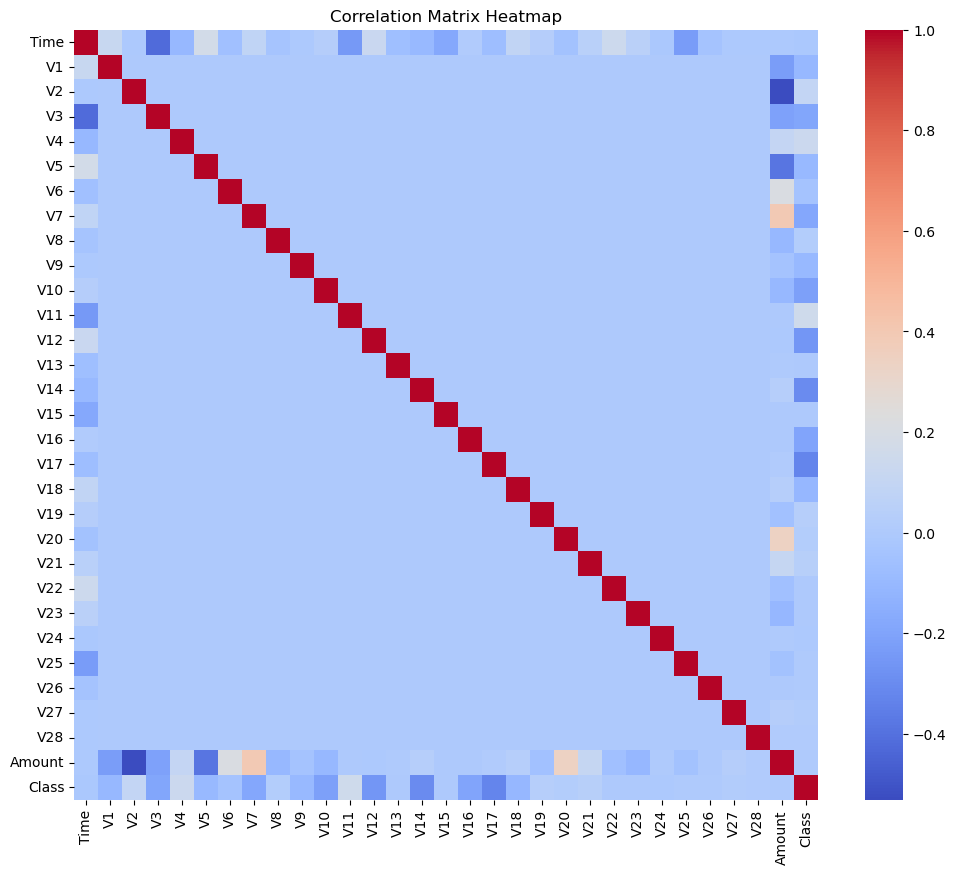

In [15]:
# Correlation Matrix Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

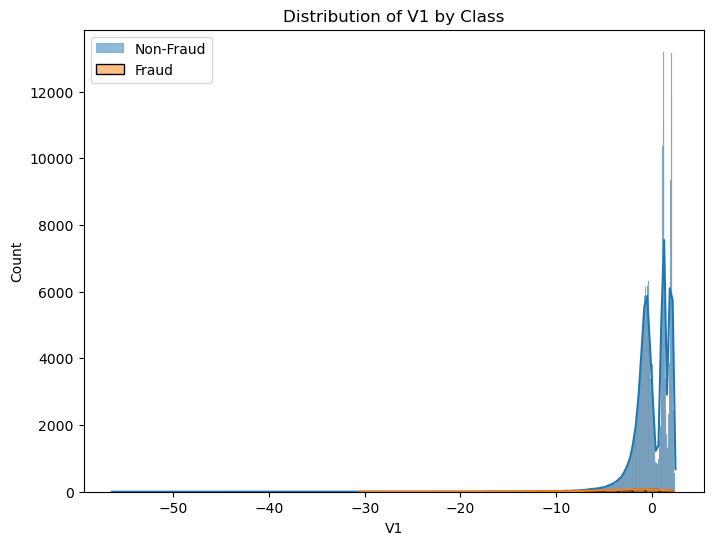

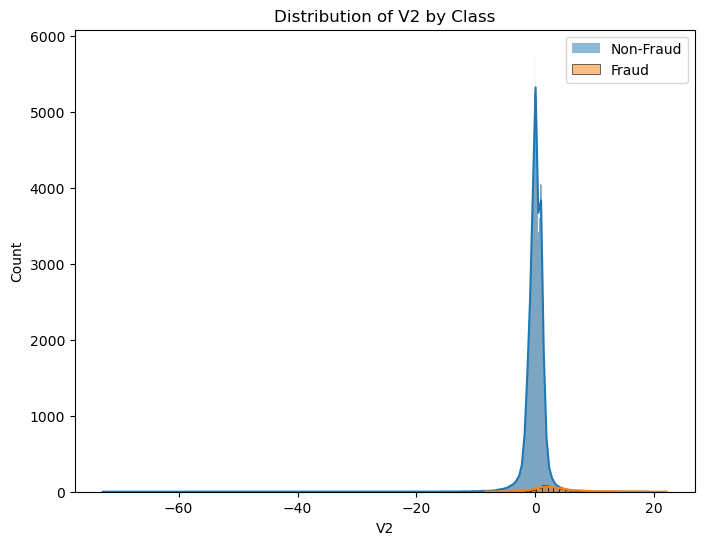

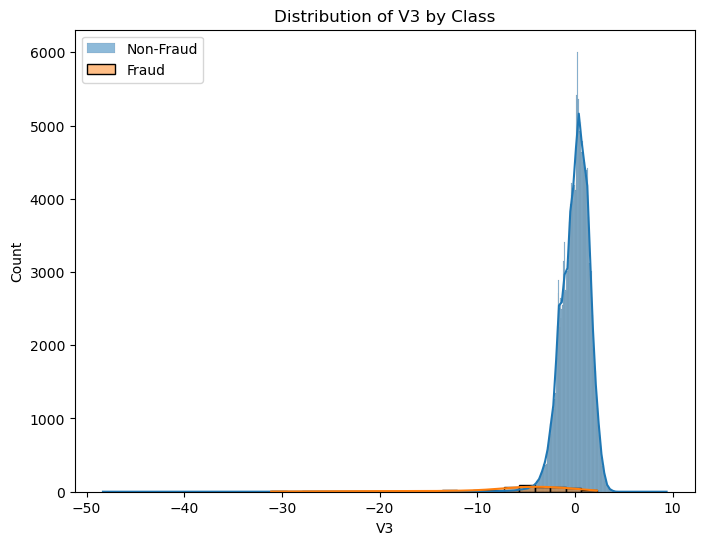

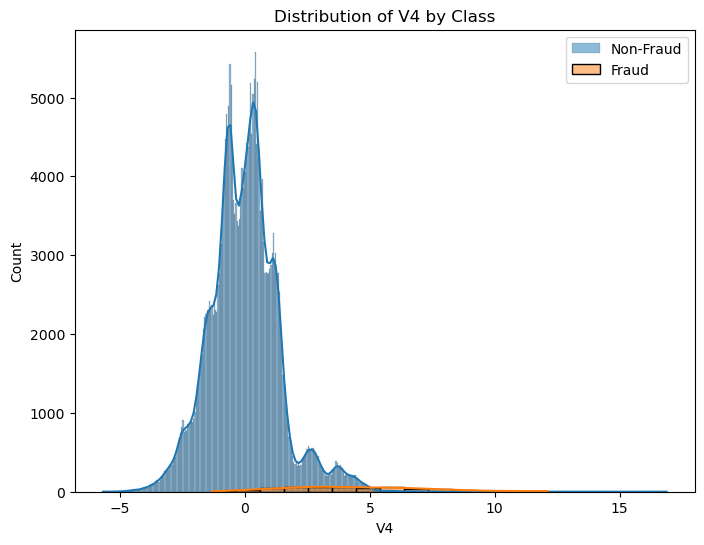

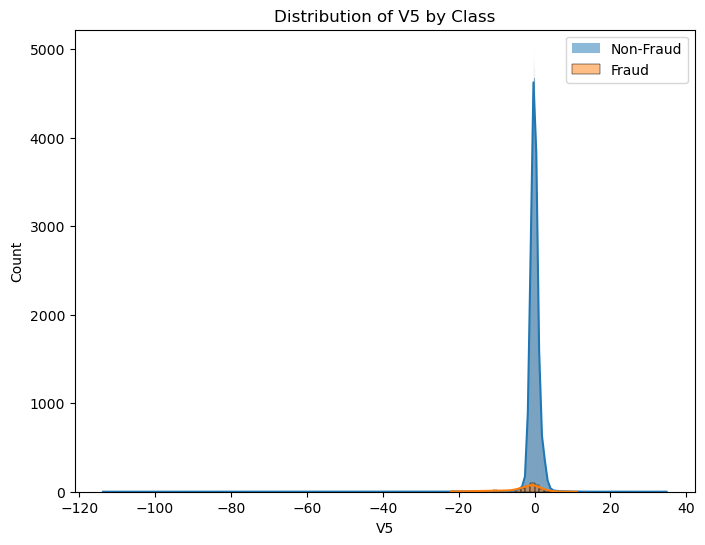

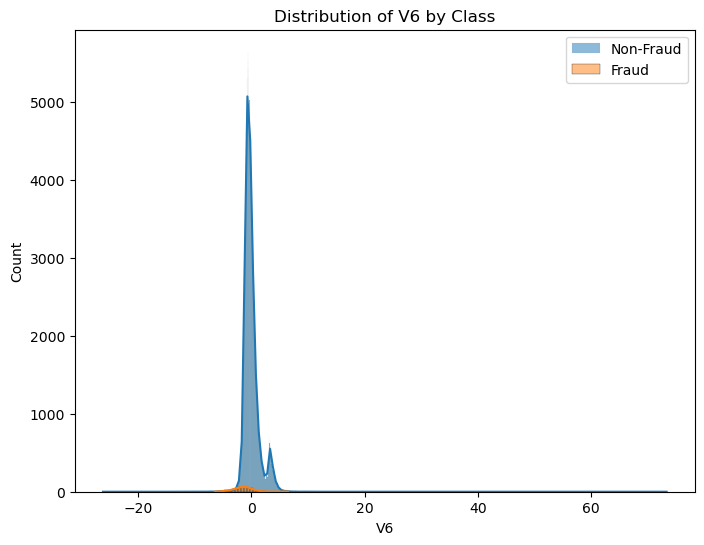

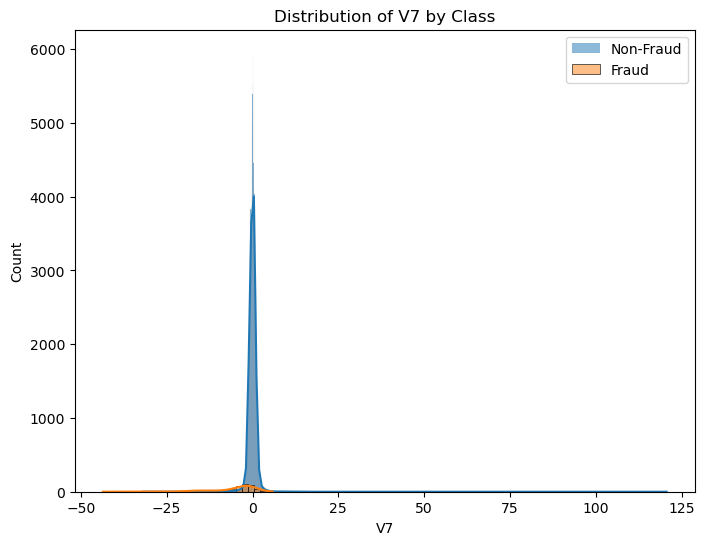

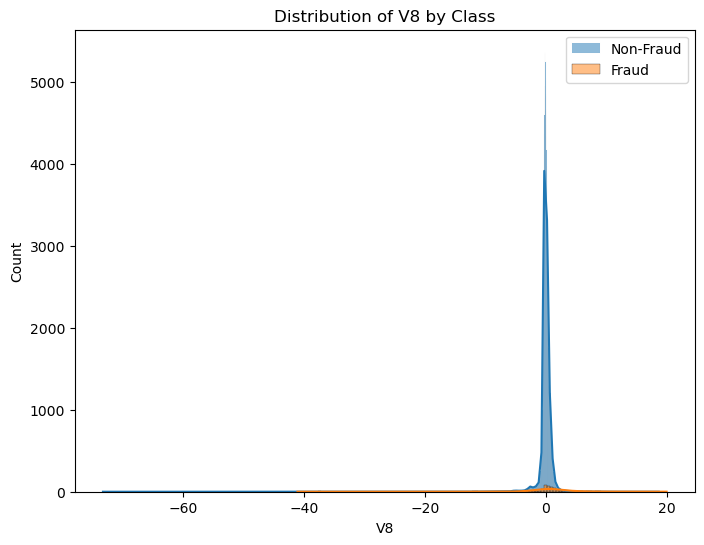

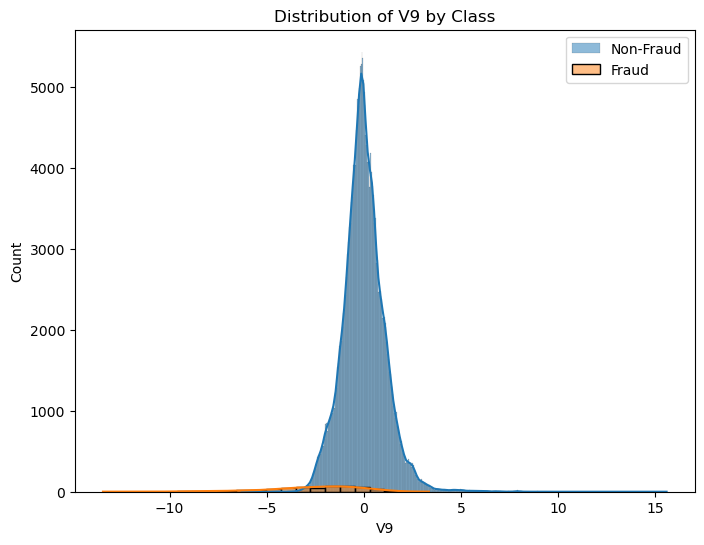

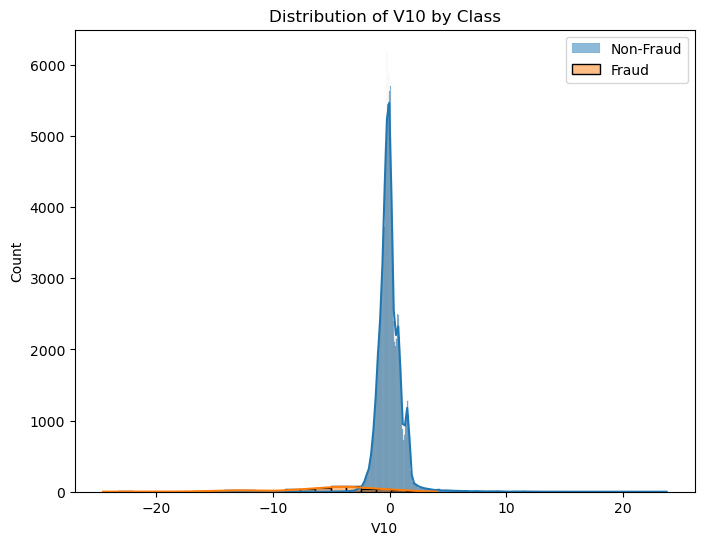

In [16]:
# Histograms of Features for Fraudulent and Non-Fraudulent Transactions
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[data['Class'] == 0][feature], label='Non-Fraud', kde=True)
    sns.histplot(data[data['Class'] == 1][feature], label='Fraud', kde=True)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()

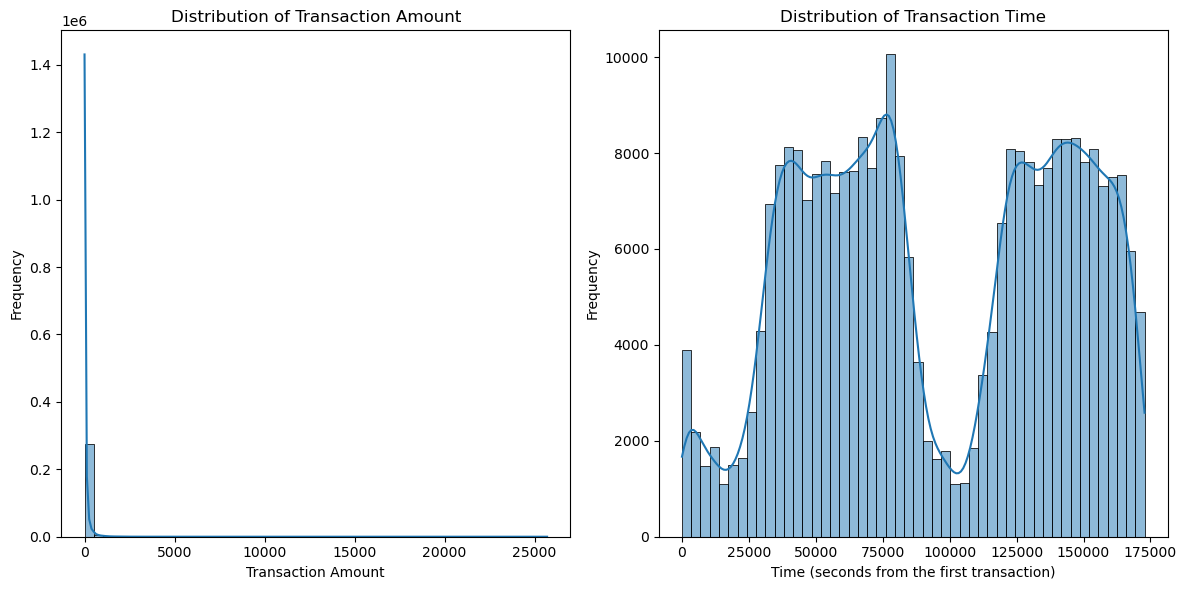

In [17]:
# Combined visualization for Amount and Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')

plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=50, kde=True)
plt.xlabel('Time (seconds from the first transaction)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Time')

plt.tight_layout()
plt.show()

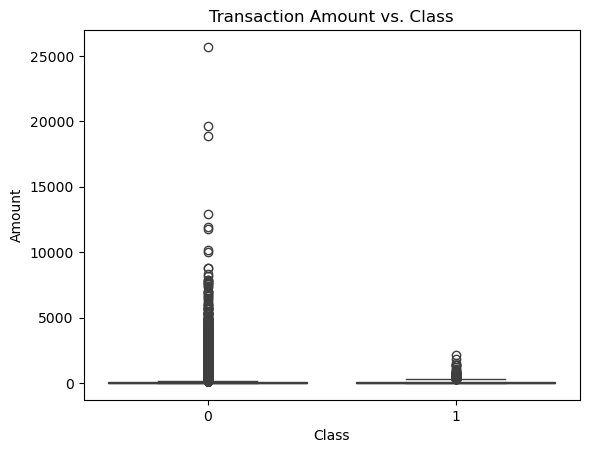

In [18]:
# Transaction amount vs. fraud
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount vs. Class')
plt.show()

<h2> MODEL TRAINING

In [19]:
# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [20]:
# # Apply SMOTE to oversample the minority class
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Print the class distribution after SMOTE
# print(pd.Series(y_resampled).value_counts())

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> MODEL SELECTION </h2>


In [22]:
# Analyze the results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def analyze_results(y_test,y_pred):
    # Get the metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision =  metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

    # print metrics
    print("Accuracy:", "%.6f" % accuracy)
    print("Precision:", "%.6f" % precision)
    print("Recall:", "%.6f" %  recall)
    print("F1 Score:", "%.6f" %  f1_score)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))

    # Produce a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral', 'Positive', 'Negative'],
                yticklabels=['Neutral', 'Positive', 'Negative'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1_score

<h2> XgBoost  </h2>

In [24]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.4/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 1.6/124.9 MB 13.0 MB/s eta 0:00:10
    --------------------------------------- 3.0/124.9 MB 18.9 MB/s eta 0:00:07
   - -------------------------------------- 4.0/124.9 MB 19.6 MB/s eta 0:00:07
   - -------------------------------------- 4.1/124.9 MB 16.2 MB/s eta 0:00:08
   - -------------------------------------- 5.4/124.9 MB 18.3 MB/s eta 0:00:07
   - -------------------------------------- 5.8/124.9 MB 18.5 MB/s eta 0:00:07
   -- ------------------------------------- 6.7/124.9 MB 16.4 MB/s eta 0:00:08
   -- ------------------------------------- 7.7/124.9 MB 17.6 MB/s eta 0:00:07
   -- ------------------------------------- 8.5/124.9 MB 17.1 MB/s eta 0:00:07
   --- ------------------------------------ 9.4/124.9 MB 17.7 

Accuracy: 0.999561
Precision: 0.999549
Recall: 0.999561
F1 Score: 0.999538
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



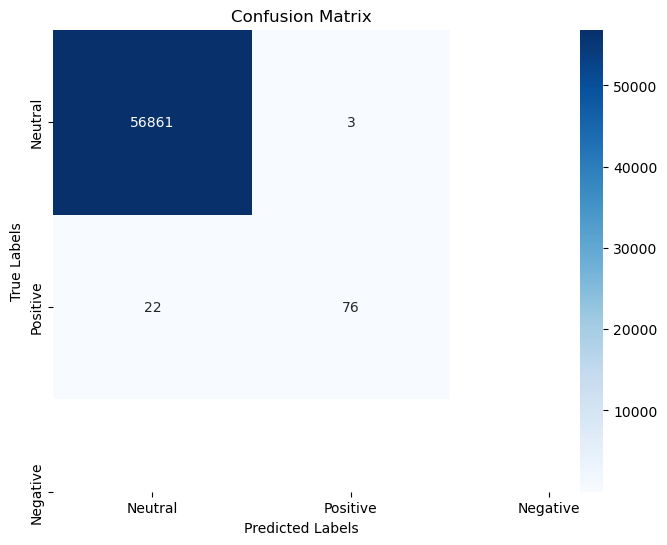

(0.9995611109160493, 0.999548573249352, 0.9995611109160493, 0.9995375913777176)

In [25]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Analyze the results
analyze_results(y_test, y_pred_xgb)

<h2> Random Forest Classifier

Accuracy: 0.999561
Precision: 0.999552
Recall: 0.999561
F1 Score: 0.999535
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



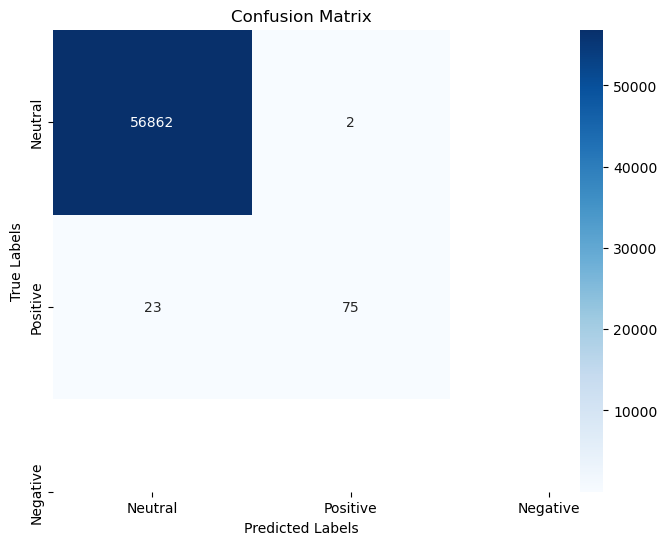

(0.9995611109160493, 0.9995516842152548, 0.9995611109160493, 0.999534818084207)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Analyze the results
analyze_results(y_test, y_pred_rf)

<h2> Gradient Boosting Machine </h2>

Accuracy: 0.998947
Precision: 0.998864
Recall: 0.998947
F1 Score: 0.998893
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



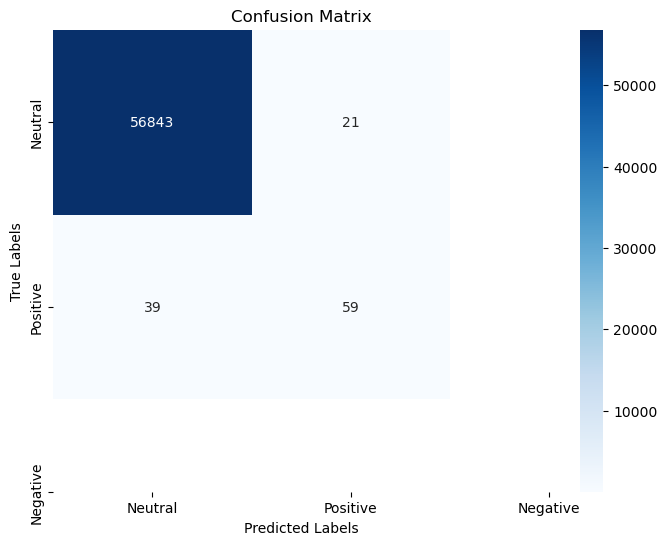

(0.9989466661985184,
 0.9988639328207966,
 0.9989466661985184,
 0.9988934910915087)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Machine classifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Analyze the results
analyze_results(y_test, y_pred_gbm)

C:\Users\Nishar Ansari\AppData\Local\Temp\ipykernel_2752\2863704663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


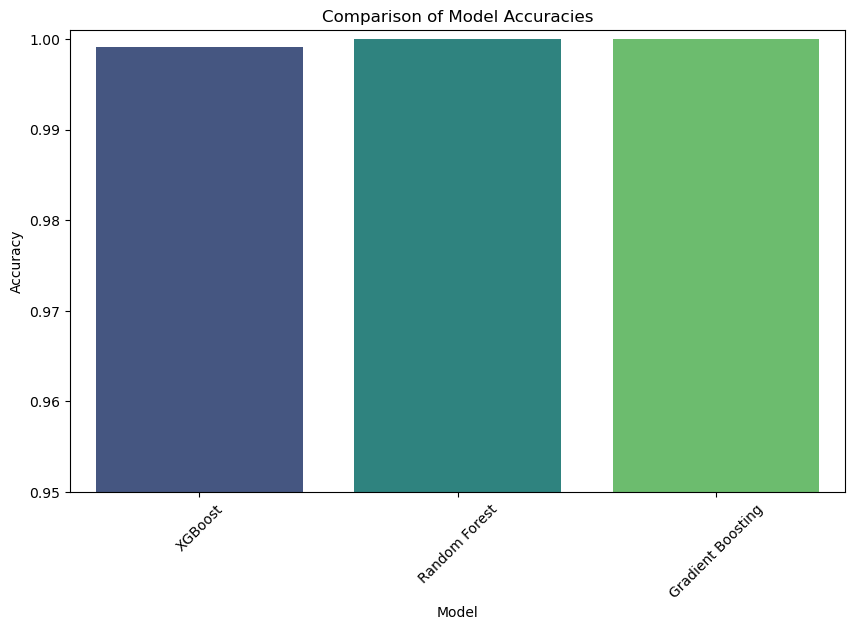

In [28]:
# compare accuracy of the 3 models visualisation

import matplotlib.pyplot as plt
model_names = ['XGBoost', 'Random Forest', 'Gradient Boosting']
accuracies = [0.999145, 1.000000, 1.000000]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xticks(rotation=45)
plt.ylim(0.95, 1.001)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

<h2> Gradio Interface

<h3> Define a Function to Get Predictions

In [29]:
pip install gradio

     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
    --------------------------------------- 0.8/42.3 MB 26.1 MB/s eta 0:00:02
   - -------------------------------------- 2.0/42.3 MB 21.3 MB/s eta 0:00:02
   -- ------------------------------------- 3.1/42.3 MB 24.5 MB/s eta 0:00:02
   ---- ----------------------------------- 4.7/42.3 MB 27.5 MB/s eta 0:00:02
   ----- ---------------------------------- 5.7/42.3 MB 24.2 MB/s eta 0:00:02
   ----- ---------------------------------- 6.2/42.3 MB 22.2 MB/s eta 0:00:02
   ------ --------------------------------- 6.6/42.3 MB 20.1 MB/s eta 0:00:02
   ------ --------------------------------- 6.8/42.3 MB 19.0 MB/s eta 0:00:02
   ------ --------------------------------- 7.0/42.3 MB 17.3 MB/s eta 0:00:03
   ------ --------------------------------- 7.3/42.3 MB 15.6 MB/s eta 0:00:0

In [30]:
import gradio as gr

# Assuming you have defined the three models elsewhere in your code: xgb_model, rf_model, gb_model
# Make sure you import or define these models before using them in the Gradio interface

# Prediction function using the three models
def predict_fraud(*features):
    # Convert the input features into a list
    input_data = [features]

    # Get predictions from each of the three models
    xgb_pred = xgb_model.predict(input_data)[0]
    rf_pred = rf_model.predict(input_data)[0]
    gb_pred = gbm_model.predict(input_data)[0]

    # Return predictions
    return (
        "Fraud" if xgb_pred == 1 else "Not Fraud",
        "Fraud" if rf_pred == 1 else "Not Fraud",
        "Fraud" if gb_pred == 1 else "Not Fraud"
    )

# Define input labels
input_labels = [
    "Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12",
    "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24",
    "V25", "V26", "V27", "V28", "Amount"
]

# Create Gradio interface using the updated components syntax
gradio_interface = gr.Interface(
    fn=predict_fraud,
    inputs=[gr.Number(label=label) for label in input_labels],
    outputs=[
        gr.Textbox(label="XGBoost Prediction"),
        gr.Textbox(label="Random Forest Prediction"),
        gr.Textbox(label="Gradient Boosting Prediction")
    ],
    title="Credit Card Fraud Detection with XGBoost, Random Forest, and Gradient Boosting",
    description="Enter transaction details to get predictions from three different models."
)

# Launch the Gradio app
gradio_interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://f5b2b57edd277d45a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<h2> MLFlow

In [31]:
pip install mlflow

   ---------------------------------------- 0.0/26.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/26.7 MB 20.5 MB/s eta 0:00:02
   --- ------------------------------------ 2.2/26.7 MB 24.0 MB/s eta 0:00:02
   ----- ---------------------------------- 3.3/26.7 MB 26.7 MB/s eta 0:00:01
   ------ --------------------------------- 4.5/26.7 MB 26.5 MB/s eta 0:00:01
   ------- -------------------------------- 5.3/26.7 MB 24.2 MB/s eta 0:00:01
   -------- ------------------------------- 5.7/26.7 MB 21.5 MB/s eta 0:00:01
   -------- ------------------------------- 6.0/26.7 MB 19.1 MB/s eta 0:00:02
   --------- ------------------------------ 6.1/26.7 MB 17.1 MB/s eta 0:00:02
   --------- ------------------------------ 6.4/26.7 MB 15.7 MB/s eta 0:00:02
   --------- ------------------------------ 6.7/26.7 MB 14.2 MB/s eta 0:00:02
   ---------- ----------------------------- 7.0/26.7 MB 13.5 MB/s eta 0:00:02
   ---------- ----------------------------- 7.2/26.7 MB 13.1 MB/s eta 0:

In [34]:
""" This code will only work if you are running this code on offline compiler in local host as the mlflow will work on local host.
run in CMD
pip install mlflow
mlflow ui
"""
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# xgb_model
y_pred = xgb_model.predict(X_test)

# Model parameters
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Set experiment and tracking URI
mlflow.set_experiment("Credit Card Fraud Detection")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run():
    # Log model parameters
    mlflow.log_params(params)
    
    # Log evaluation metrics
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })

    # Log the model
    mlflow.sklearn.log_model(xgb_model, "xgb_model")

""" After running this, copy the url given in cmd and paste it in brower, there you will see the name experiment name, select it and there you can see the results"""

2024/10/17 12:12:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 12:12:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run glamorous-flea-347 at: http://127.0.0.1:5000/#/experiments/135179840022959094/runs/a0bc37f8750f4e978e29d818df57e522.
2024/10/17 12:12:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/135179840022959094.


In [38]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set MLflow tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

def log_model_with_mlflow(model_name, model, X_train, y_train, X_test, y_test, params=None):
       
    # Set the experiment name
    mlflow.set_experiment("Credit Card Fraud Detection")
    
    # Start an MLflow run
    with mlflow.start_run(run_name=model_name):
        # Log model parameters (if any)
        if params:
            mlflow.log_params(params)
        
        # Train the model (if not already trained)
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Log the evaluation metrics
        mlflow.log_metrics({
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        })
        
        # Log the model itself
        mlflow.sklearn.log_model(model, model_name)
        
        print(f"{model_name} has been logged to MLflow with accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, f1_score: {f1:.4f}")

# Example usage for multiple models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Define models and their hyperparameters
models = {
    "Random Forest": (RandomForestClassifier(), {"n_estimators": 100, "max_depth": 5}),
    "Logistic Regression": (LogisticRegression(), {"solver": "liblinear"}),
    "XGBoost": (xgb.XGBClassifier(), {"n_estimators": 100, "learning_rate": 0.1})
}

# Train and log each model with MLflow
for model_name, (model, params) in models.items():
    log_model_with_mlflow(model_name, model, X_train, y_train, X_test, y_test, params=params)


2024/10/17 12:39:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 12:39:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/135179840022959094/runs/23a921c7264c4faca03822bf1e60216a.
2024/10/17 12:39:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/135179840022959094.


Random Forest has been logged to MLflow with accuracy: 0.9996, precision: 0.9744, recall: 0.7755, f1_score: 0.8636


C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/10/17 12:39:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 12:39:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/135179840022959094/runs/b6e2ca99343445b3b7c5cfa939595c54.
2024/10/17 12:39:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment a

Logistic Regression has been logged to MLflow with accuracy: 0.9988, precision: 0.6552, recall: 0.5816, f1_score: 0.6162


2024/10/17 12:39:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 12:39:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/135179840022959094/runs/f9b5c02871434934baf6dddeeb53413a.
2024/10/17 12:39:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/135179840022959094.


XGBoost has been logged to MLflow with accuracy: 0.9996, precision: 0.9620, recall: 0.7755, f1_score: 0.8588
